In [197]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from scipy import stats

In [5]:
# Set  graph size 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data preprocessing stage

In [6]:
# Reading the firmo data into dataframe 
firmo_data_df = pd.read_csv('../mal_high/firmo_data.csv')

# Removing those rows which does not have revenue value or org size 
firmo_data_df.dropna(inplace= True)

# Re-naming the _cols2 to org_count
col_name = {'_col2':'org_count'}
firmo_data_df.rename(columns=col_name,inplace=True)

In [7]:
#sample data output 
firmo_data_df.head()

revenue             size  org_count
0    200M - 1B       200-to-500        965
1  100M - 200M         10-to-50        217
2         > 1B        50-to-200         65
3     1M - 10M  5,000-to-10,000          1
4   50M - 100M         10-to-50        357

# Data analysis stage for firmo data 

This analysis will decide which kind of organization should be seleted for diffrent kind of org_size and revenue
 

In [8]:

#Creating bar - graph between  size and org_count for each category of revenue
# Finding out all the varitions in revenue deatils 


revenue_data= firmo_data_df['revenue'].unique()
size_data = firmo_data_df['size'].unique()
revenue_data.sort()
size_data.sort()

In [9]:
print(size_data)
print(revenue_data)


['1,000-to-5,000' '1-to-10' '10-to-50' '200-to-500' '5,000-to-10,000'
 '50-to-200' '500-to-1,000' '> 10,000']
['0 - 1M' '100M - 200M' '10M - 50M' '1M - 10M' '200M - 1B' '50M - 100M'
 '> 1B']


In [17]:
# data for org which has revenue between '100M - 200M'
firmo_data_df[firmo_data_df['revenue'] == revenue_data[1]]

revenue             size  org_count
1   100M - 200M         10-to-50        217
16  100M - 200M         > 10,000         17
41  100M - 200M       200-to-500       1163
42  100M - 200M          1-to-10         84
43  100M - 200M   1,000-to-5,000      10983
46  100M - 200M        50-to-200        708
54  100M - 200M  5,000-to-10,000         55
64  100M - 200M     500-to-1,000      29428

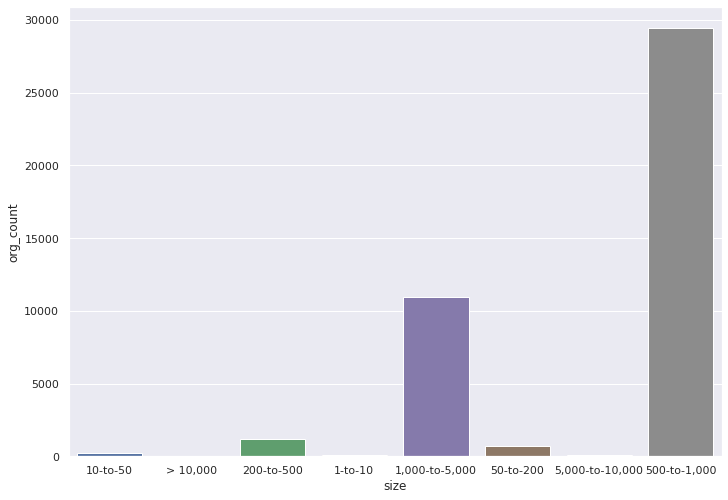

In [18]:
# plotting a bar graph to show the count 
sns.barplot(x = 'size',y='org_count',data =firmo_data_df[firmo_data_df['revenue'] == revenue_data[1]] )

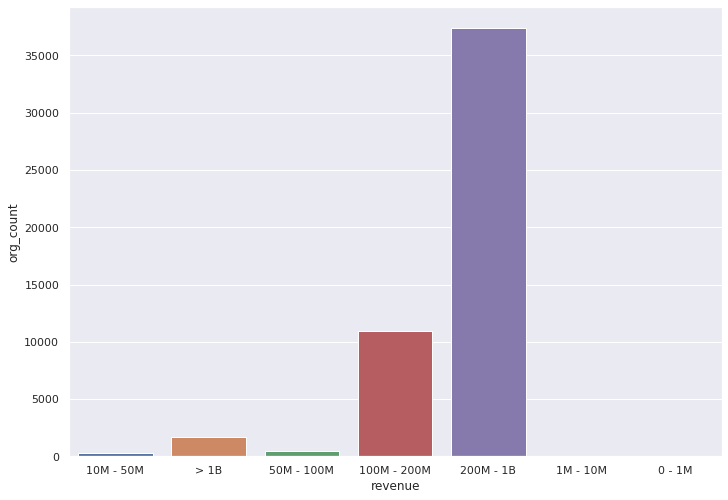

In [12]:
#plt.figure(figsize=(20,5))
sns.barplot(x = 'revenue',y='org_count',data =firmo_data_df[firmo_data_df['size'] == size_data[0]] )

In [13]:
#df = firmo_data_df.sort_values(['size','revenue']).groupby(['size','revenue'], as_index=False).first()

In [14]:
grouped_df = firmo_data_df.groupby(by = ['revenue','size']).max()
grouped_df.to_csv('../mal_high/revenue_size_combo.csv')

In [19]:
grouped_df

org_count
revenue     size                      
0 - 1M      1,000-to-5,000          10
            1-to-10            2970983
            10-to-50             13071
            200-to-500              47
            5,000-to-10,000          2
            50-to-200             1131
            500-to-1,000            15
            > 10,000                 1
100M - 200M 1,000-to-5,000       10983
            1-to-10                 84
            10-to-50               217
            200-to-500            1163
            5,000-to-10,000         55
            50-to-200              708
            500-to-1,000         29428
            > 10,000                17
10M - 50M   1,000-to-5,000         314
            1-to-10                937
            10-to-50              3902
            200-to-500           86994
            5,000-to-10,000          9
            50-to-200           396302
            500-to-1,000           867
            > 10,000                 4
1M - 10M    1,000-to-5,000          34
            1-to-10            1359697
            10-to-50           4956593
            200-to-500             992
            5,000-to-10,000          1
            50-to-200           143695
            500-to-1,000           114
            > 10,000                 1
200M - 1B   1,000-to-5,000       37385
            1-to-10                 49
            10-to-50               167
            200-to-500             965
            5,000-to-10,000       3973
            50-to-200              442
            500-to-1,000          1426
            > 10,000               206
50M - 100M  1,000-to-5,000         481
            1-to-10                136
            10-to-50               357
            200-to-500           57570
            5,000-to-10,000         22
            50-to-200             1438
            500-to-1,000         24561
            > 10,000                 2
> 1B        1,000-to-5,000        1654
            1-to-10                  3
            10-to-50                30
            200-to-500             123
            5,000-to-10,000       6708
            50-to-200               65
            500-to-1,000           205
            > 10,000              9723

On analysis of Firmo data , major conclusion was as follows:

1. For every category of revenue , we have org size which keeps increasing , as revenue increases 

2. For every category if we select the top two size values it covers most of the org 



# Analysis of MAL data for deciding that which org should be selected based on number of category and sub- category of products 

In [20]:
# Reading MAL data which have high intesity product deatils for every company . 
# We will read the mal account and drop out unimportant columns 

# Read mal account in dataframe
mal_df   = pd.read_csv('../mal_high/mal_data.csv')

# Selecting important columns for analysis 
df = pd.read_csv('../mal_high/column_choice.csv')
important_cols = list(df[df['choose'] == 1]['Variable_nam'].values)
mal_data_df = mal_df[important_cols]

In [227]:
mal_data_df['vendor'].unique().size

4624

In [168]:
# list of cloud category and sub category 
cat_list = ['STORAGE',
 'SERVERS',
 'HOSTING SERVICES',
 'CONTENT MANAGEMENT SYSTEMS',
 'IT INFRASTRUCTURE',
 'ARTIFICIAL INTELLIGENCE',
 'DEVELOPMENT',
 'ANALYTICS']

sub_list= ['APPLICATION RELEASE ORCHESTRATION SOFTWARE',
 'TRANSACTIONAL EMAIL SOFTWARE',
 'EMAIL SOFTWARE',
 'AI PLATFORMS SOFTWARE',
 'EMAIL VERIFICATION SOFTWARE',
 'APPLICATION DEVELOPMENT SOFTWARE',
 'MACHINE LEARNING SOFTWARE',
 'DATA WAREHOUSE SOFTWARE',
 'SERVER VIRTUALIZATION SOFTWARE',
 'DATABASE SOFTWARE',
 'ENTERPRISE SEARCH SOFTWARE',
 'CONTAINERIZATION SOFTWARE',
 'STORAGE MANAGEMENT SOFTWARE',
 'LOAD BALANCING SOFTWARE',
 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
 'CONTINUOUS DELIVERY SOFTWARE',
 'WEB ACCELERATOR SOFTWARE',
 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS']

In [159]:
# finding of the range of products a particular org uses according to MAL accounts and also filtering out those
# org which has any of cloud details products on it 

group_data  = mal_data_df[mal_data_df['category'].isin(cat_list) |\
                       mal_data_df['subcategory'].isin(sub_list) ].groupby('global_url').count()

In [219]:
group_data

vendor  topic  tpid  category  subcategory  \
global_url                                                              
000700.com                      3      3     3         3            3   
000860.com                      6      6     6         6            6   
0101.co.jp                     10     10    10        10           10   
02096998.com                    6      6     6         6            6   
059rc.com                      28     28    28        28           28   
...                           ...    ...   ...       ...          ...   
zywave.com                    156    156   156       156          156   
zyxel.com                      31     31    31        31           31   
zzgzorggroep.nl                24     24    24        24           24   
zzzs.si                         9      9     9         9            9   
ä¸šå ´ä¼æ¥­ã‚µãƒ¼ãƒ.com      34     34    34        34           34   

                           dm_country  state  areaname  subsidiaryname  \
global_url                                                               
000700.com                          3      0         3               3   
000860.com                          6      0         6               6   
0101.co.jp                         10      0        10              10   
02096998.com                        6      0         6               6   
059rc.com                          28      1        28              28   
...                               ...    ...       ...             ...   
zywave.com                        156     70       156             156   
zyxel.com                          31     17        31              31   
zzgzorggroep.nl                    24      0        24              24   
zzzs.si                             9      0         9               9   
ä¸šå ´ä¼æ¥­ã‚µãƒ¼ãƒ.com          34      2        34              34   

                           segment  vertical  s400_flag  location_url  \
global_url                                                              
000700.com                       3         3          0             0   
000860.com                       6         6          0             6   
0101.co.jp                      10        10          0            10   
02096998.com                     6         6          0             6   
059rc.com                       28        28          0            28   
...                            ...       ...        ...           ...   
zywave.com                     156       156          0             0   
zyxel.com                       31        31          0            31   
zzgzorggroep.nl                 24        24          0             0   
zzzs.si                          9         9          0             0   
ä¸šå ´ä¼æ¥­ã‚µãƒ¼ãƒ.com       34        34          0            34   

                           salesunit  
global_url                            
000700.com                         3  
000860.com                         6  
0101.co.jp                        10  
02096998.com                       6  
059rc.com                         28  
...                              ...  
zywave.com                       156  
zyxel.com                         31  
zzgzorggroep.nl                   24  
zzzs.si                            9  
ä¸šå ´ä¼æ¥­ã‚µãƒ¼ãƒ.com         34  

[43255 rows x 14 columns]

In [167]:
group_data.describe()

vendor         topic          tpid      category   subcategory  \
count  43255.000000  43255.000000  43255.000000  43255.000000  43255.000000   
mean      77.384418     77.384418     77.384418     77.384418     77.384418   
std      201.392211    201.392211    201.392211    201.392211    201.392211   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       23.000000     23.000000     23.000000     23.000000     23.000000   
50%       43.000000     43.000000     43.000000     43.000000     43.000000   
75%       78.000000     78.000000     78.000000     78.000000     78.000000   
max    12011.000000  12011.000000  12011.000000  12011.000000  12011.000000   

         dm_country         state      areaname  subsidiaryname       segment  \
count  43255.000000  43255.000000  43255.000000    43255.000000  43255.000000   
mean      77.384418     31.179008     77.384418       77.384418     77.384418   
std      201.392211    163.393219    201.392211      201.392211    201.392211   
min        1.000000      0.000000      1.000000        1.000000      1.000000   
25%       23.000000      0.000000     23.000000       23.000000     23.000000   
50%       43.000000      2.000000     43.000000       43.000000     43.000000   
75%       78.000000     17.000000     78.000000       78.000000     78.000000   
max    12011.000000  10367.000000  12011.000000    12011.000000  12011.000000   

           vertical  s400_flag  location_url     salesunit  
count  43255.000000    43255.0  43255.000000  43255.000000  
mean      77.384418        0.0     20.942689     77.384418  
std      201.392211        0.0    126.489892    201.392211  
min        1.000000        0.0      0.000000      1.000000  
25%       23.000000        0.0      0.000000     23.000000  
50%       43.000000        0.0      0.000000     43.000000  
75%       78.000000        0.0      2.000000     78.000000  
max    12011.000000        0.0   8451.000000  12011.000000

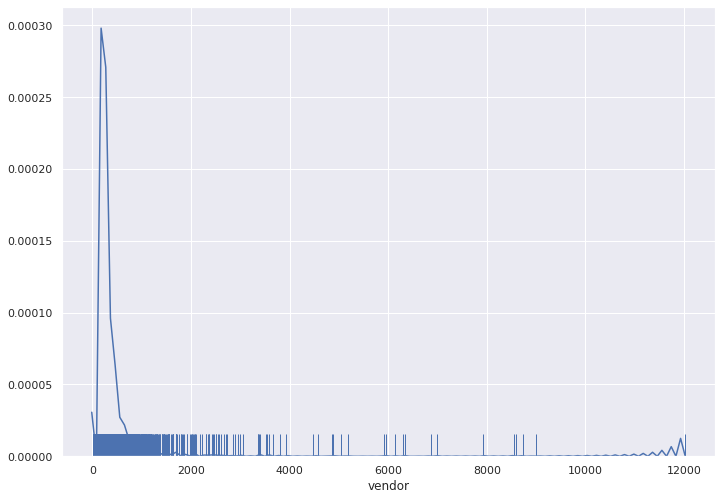

In [181]:
sns.distplot(group_data['vendor'], rug=True, hist=False)

In [170]:
#For converting the index to columns 
group_org_data = group_data.reset_index()

# Getting the product count for each org
org_prod_cnt_df =  group_org_data[['global_url','vendor']]
col_name = {'vendor':'prod_count'}
org_prod_cnt_df.rename(columns=col_name,inplace=True)


In [65]:
# Selecting the org list name which has more than 500 products 
#grouped_data_df = merged_df.groupby(by = ['global_url']).count().sort_values('website',ascending =False)
#grouped_data_df

In [186]:
df_output = pd.DataFrame(None)
cnt = 0 
for file in os.listdir('../mal_high/firmo_data/'):
    
    output_list = []
    file_loc = '../mal_high/firmo_data/'+file
    df = pd.read_csv(file_loc)

    merged_df = org_prod_cnt_df.merge(df,how='inner',left_on='global_url',right_on='website')

    
    
    output_df = file.split('.')[0] + '-df'
    output_list.append(output_df)
    
    # Selecting the org list name which has more than mean+ first_std , this will give the top org 
    output_list[0]= merged_df[merged_df['prod_count'] > 250]
    
    df_output = df_output.append(output_list[0])



In [187]:
#df_output.to_csv('../mal_high/output_data/org_selected.csv',index=False)

In [189]:
df_output.count()

global_url     1218
prod_count     1218
website        1218
name           1013
industry       1155
revenue        1218
size           1218
street          980
city            992
state           772
country        1218
postalcode      965
naics_code      955
sic_code        940
description    1079
dtype: int64

# Filter data based on country 

In [190]:
required_country= ['UNITED STATES', 'GERMANY', 'SWEDEN', 'CANADA', 'NETHERLANDS',
       'AUSTRIA', 'AUSTRALIA', 'UNITED KINGDOM', 'FRANCE',
        'ITALY', 
        'DENMARK', 'SWITZERLAND', 
         'JAPAN',
       'FINLAND','IRELAND', 'POLAND','NEW ZEALAND', 'SPAIN', 
        'NORWAY', 'PORTUGAL',
       'JERSEY', 'LUXEMBOURG', 
        'ISLE OF MAN', 
       'GEORGIA']

In [191]:
country_df = pd.DataFrame(required_country,columns=['country_name'])

In [192]:
country_filter_df = df_output.merge(country_df,how='inner',left_on='country',right_on='country_name')

In [193]:
country_filter_df.groupby(by = 'country').count()

global_url  prod_count  website  name  industry  revenue  \
country                                                                    
AUSTRALIA               30          30       30    29        26       30   
AUSTRIA                  1           1        1     1         1        1   
CANADA                  32          32       32     9        30       32   
DENMARK                  7           7        7     3         6        7   
FINLAND                  4           4        4     3         4        4   
FRANCE                  55          55       55    37        54       55   
GERMANY                 22          22       22    18        22       22   
IRELAND                  7           7        7     4         6        7   
ITALY                   10          10       10     8         9       10   
JAPAN                    9           9        9     9         9        9   
LUXEMBOURG               2           2        2     2         2        2   
NETHERLANDS             16          16       16     6        15       16   
NEW ZEALAND              2           2        2     2         1        2   
NORWAY                   3           3        3     2         3        3   
POLAND                   2           2        2     1         2        2   
PORTUGAL                 3           3        3     3         3        3   
SPAIN                   15          15       15     9        13       15   
SWEDEN                  11          11       11     4        11       11   
SWITZERLAND             14          14       14    12        13       14   
UNITED KINGDOM          67          67       67    29        63       67   
UNITED STATES          808         808      808   756       778      808   

                size  street  city  state  postalcode  naics_code  sic_code  \
country                                                                       
AUSTRALIA         30      27    27     16          27          25        23   
AUSTRIA            1       1     1      0           1           1         1   
CANADA            32       9     8      6           7           7         7   
DENMARK            7       3     3      0           3           2         2   
FINLAND            4       3     3      0           3           3         3   
FRANCE            55      36    37      0          34          36        36   
GERMANY           22      16    15      0          17          17        17   
IRELAND            7       4     4      0           1           4         4   
ITALY             10       8     8      2           7           7         7   
JAPAN              9       9     9      0           9           9         9   
LUXEMBOURG         2       2     1      0           2           2         2   
NETHERLANDS       16       5     5      0           1           5         5   
NEW ZEALAND        2       1     1      0           0           1         1   
NORWAY             3       2     2      0           2           2         2   
POLAND             2       0     1      0           0           1         1   
PORTUGAL           3       2     3      0           2           3         3   
SPAIN             15       9     9      2           9           8         8   
SWEDEN            11       4     4      0           3           4         4   
SWITZERLAND       14      12    12      0          12          11        11   
UNITED KINGDOM    67      26    27      3          25          24        24   
UNITED STATES    808     743   750    733         742         730       722   

                description  country_name  
country                                    
AUSTRALIA                22            30  
AUSTRIA                   1             1  
CANADA                   28            32  
DENMARK                   6             7  
FINLAND                   4             4  
FRANCE                   51            55  
GERMANY                  19            22  
IRELAND                   6             7  
ITALY    

In [195]:
country_filter_df.count()

global_url      1120
prod_count      1120
website         1120
name             947
industry        1071
revenue         1120
size            1120
street           922
city             930
state            762
country         1120
postalcode       907
naics_code       902
sic_code         892
description     1007
country_name    1120
dtype: int64

In [ ]:
# Normalizig 

In [217]:
fitted_data, fitted_lambda = stats.boxcox(group_data['vendor']) 

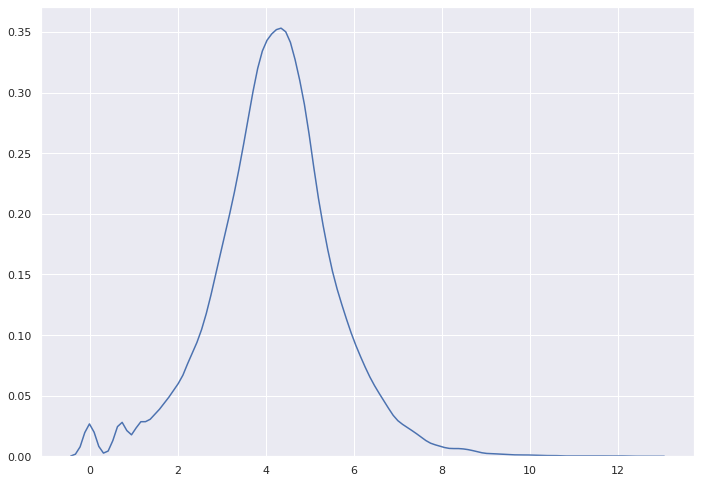

In [218]:
sns.distplot(fitted_data, hist = False, kde = True)

In [215]:
fitted_lambda

0.06005066122127522